## 音高
## 时值
## 小节
## 速度

In [33]:
# !ls ./材料 -ahl
!chmod -Rf 777 ./材料/


In [17]:
def delstr(text,text_del,text_replace=''):
    try:
        text=text.replace(text_del,text_replace)
    except Exception as s:
        print(s)
    return text

def notes_init(notes):
    note={'index':len(notes),
          'pitch':0,
          'velocity':0,
          'start_time':0,
          'end_time':0,
          'duration':0}
    notes.append(note)
    return note['index']

def replacing_dictionary_values(notes,line,index,key):
    value=line.split(': ')[-1]
    notes[index][key]=float(value)
    # print(notes[index])

f=open('材料\summer.txt','r')
notes=[]
# note_key=['pitch','velocity','start_time','end_time']

for line in f:
    line=delstr(line,'\n')
    if 'notes {' in line :
        index=notes_init(notes)
    elif 'pitch' in line :
        replacing_dictionary_values(notes,line,index,'pitch')
    elif 'velocity' in line :
        replacing_dictionary_values(notes,line,index,'velocity')
    elif 'start_time' in line :
        replacing_dictionary_values(notes,line,index,'start_time')
    elif 'end_time' in line :
        replacing_dictionary_values(notes,line,index,'end_time')

        

print(notes)


[{'index': 0, 'pitch': 47.0, 'velocity': 74.0, 'start_time': 0.02, 'end_time': 0.33, 'duration': 0}, {'index': 1, 'pitch': 54.0, 'velocity': 84.0, 'start_time': 0.34, 'end_time': 0.49, 'duration': 0}, {'index': 2, 'pitch': 59.0, 'velocity': 78.0, 'start_time': 0.67, 'end_time': 0.77, 'duration': 0}, {'index': 3, 'pitch': 54.0, 'velocity': 82.0, 'start_time': 1.01, 'end_time': 1.12, 'duration': 0}, {'index': 4, 'pitch': 82.0, 'velocity': 79.0, 'start_time': 1.02, 'end_time': 1.14, 'duration': 0}, {'index': 5, 'pitch': 91.0, 'velocity': 69.0, 'start_time': 1.34, 'end_time': 1.35, 'duration': 0}, {'index': 6, 'pitch': 43.0, 'velocity': 78.0, 'start_time': 1.33, 'end_time': 1.45, 'duration': 0}, {'index': 7, 'pitch': 84.0, 'velocity': 68.0, 'start_time': 1.67, 'end_time': 1.68, 'duration': 0}, {'index': 8, 'pitch': 50.0, 'velocity': 73.0, 'start_time': 1.67, 'end_time': 1.82, 'duration': 0}, {'index': 9, 'pitch': 55.0, 'velocity': 82.0, 'start_time': 2.0, 'end_time': 2.13, 'duration': 0}, 

In [18]:
def midi_to_scientific_pitch(midi_number):
    # MIDI音符编号到音名的映射
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    
    # 计算八度和音名
    octave = int((midi_number // 12) - 1)
    note_index = int(midi_number % 12)
    note = notes[note_index]
    
    # 返回科学音高记号
    return f"{note}{octave}"

# # 示例：将 MIDI 音符编号 60 转换为科学音高记号
# print(midi_to_scientific_pitch(60))  # 输出 C4

# def pitch_to_note_name(pitch):
#     #音名列表，从C开始，包含所有的半音
#     notes =['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
#     #计算pitch在notes列表中的索引
#     # #由于我们是从@开始计数的，而音名列表是从C开始的，所以需要做一些调整#我们还需要将pitch值映射到@到11的范围内，因为notes列表只有12个元素
#     index=int(pitch % 12)
#     # 返回对应的音名
#     #添加八度标记，假设每12个pitch值是一个新的八度
#     try:
#         return notes[index]+str(1+int(pitch // 12))
#     except Exception as s:
#         print(s)
#         print('error pitch:',pitch,'index:',index)

def draft_duration(start,end):
    #初步计算时长，保证不为空值
    duration = end - start
    return duration
    
for note in notes :
    #替换为拍号
    # note['pitch']=pitch_to_note_name(note['pitch'])
    note['pitch']=midi_to_scientific_pitch(note['pitch'])
    #保证时长不为空
    note['duration']= draft_duration(note['start_time'],note['end_time'])
    
    print(note)

{'index': 0, 'pitch': 'B2', 'velocity': 74.0, 'start_time': 0.02, 'end_time': 0.33, 'duration': 0.31}
{'index': 1, 'pitch': 'F#3', 'velocity': 84.0, 'start_time': 0.34, 'end_time': 0.49, 'duration': 0.14999999999999997}
{'index': 2, 'pitch': 'B3', 'velocity': 78.0, 'start_time': 0.67, 'end_time': 0.77, 'duration': 0.09999999999999998}
{'index': 3, 'pitch': 'F#3', 'velocity': 82.0, 'start_time': 1.01, 'end_time': 1.12, 'duration': 0.1100000000000001}
{'index': 4, 'pitch': 'A#5', 'velocity': 79.0, 'start_time': 1.02, 'end_time': 1.14, 'duration': 0.11999999999999988}
{'index': 5, 'pitch': 'G6', 'velocity': 69.0, 'start_time': 1.34, 'end_time': 1.35, 'duration': 0.010000000000000009}
{'index': 6, 'pitch': 'G2', 'velocity': 78.0, 'start_time': 1.33, 'end_time': 1.45, 'duration': 0.11999999999999988}
{'index': 7, 'pitch': 'C6', 'velocity': 68.0, 'start_time': 1.67, 'end_time': 1.68, 'duration': 0.010000000000000009}
{'index': 8, 'pitch': 'D3', 'velocity': 73.0, 'start_time': 1.67, 'end_time

In [19]:
pitch_list = []
for note in notes :
    if notes.index(note) % 4 == 0:
        print('\n')
        print(note['pitch'])
    else:
        print(note['pitch'])
    pitch_list.append(note['pitch'])



B2
F#3
B3
F#3


A#5
G6
G2
C6


D3
G3
G4
D7


D3
C6
E7
A2


G#6
D7
E3
A3


A4
G#6
E3
G#5


D7
D3
A3
A4


D4
D5
A3
A4


B3
F#3
B2
F#3


B3
B4
F#3
A#5


B4
G2
C6
D3


C6
G3
B5
D3


C6
A6
G#6
A2


E3
G#6
A3
A4


G#6
E3
G#5
C6


D3
A3
A4
A6


D4
A4
E6
D5


A4
A3
E5
F#5


E6
E5
B2
D5


F#3
A#5
B3
B4


F#3
D5
B6
G2


D3
A4
G3
A5


D5
D6
E5
D3


E6
F#5
E5
E6


A2
D5
E3
E5


A3
A4
F#5
E3


G#5
F#5
C6
D3


A3
A4
D4
D5


A4
D6
A4
A3


E5
F#5
E5
B2


F#3
D5
B3
F#3


D5
B6
G2
D3


C7
A4
B6
G3


A5
D5
E6
E5


D3
F#5
E5
E6


A2
D5
E3
D6


E5
A3
A4
A5


G#5
A6
E3
D7


F#5
D7
D3
D4


F#4
F#5
A3
D5


G4
A3
G5
A4


A2
A4
C#5
A5


A4
C#5
A5
E3


A3
A4
C#5
A5


A5
E3
A4
C#5


G2
B4
A5
B4


F#5
D3
D5
F#6


B4
G3
F#5
D3


G5
F#2
A5
C#5


A4
A4
A5
C#5


C#3
A5
C#5
A4


F#3
A5
C#3
A4


C#5
E6
B2
B4


D5
A5
D6
B5


B4
F#3
F#5
D5


B3
B4
B5
B4


D5
F#3
E5
F#5


B4
D#6
G#4
B4


G#4
F#5
D#6
B2


E2
B2
B4
G#4


F#5
D#6
F#5
B4


B2
E3
G#4
D#6


B4
G4
G2
G3


F#5
B5
E5
F#5


E5
G3
D3
D5


D3
D6
A2
E5


E3
E5
B4
G4


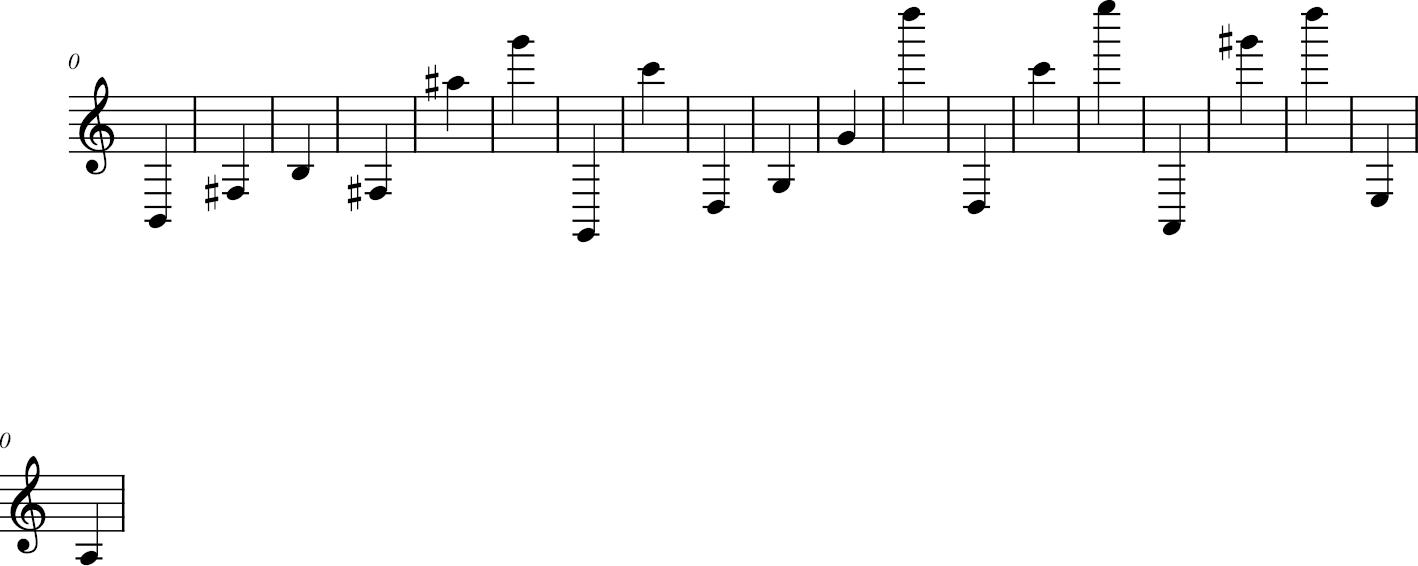

In [20]:
from music21 import *

# 创建一个Score对象，用于保存谱面
score = stream.Score()

# 创建一个Part对象，表示钢琴左手谱
left_hand_part = stream.Part()
left_hand_part.id = 'left_hand'

# 创建一个Part对象，表示钢琴右手谱
right_hand_part = stream.Part()
right_hand_part.id = 'right_hand'
# 低音谱号
right_hand_part.clef = clef.BassClef()

# 添加音符到左手谱
for i in range(20):
    one_measure = stream.Measure()
    left_hand_notes = ['C4','B4', 'F#5', 'B5']
    # for note_name in left_hand_notes:
    one_note = note.Note(pitch_list[i])
    one_measure.append(one_note)
    left_hand_part.append(one_measure)


    # # 添加音符到右手谱
    # right_hand_notes = ['C4','B2', 'F#3', 'B3']
    # for note_name in right_hand_notes:
    #     one_note = note.Note(note_name)
    #     right_hand_part.append(one_note)


# 将左手和右手谱添加到谱面中
score.insert(0, left_hand_part)
# score.insert(0, right_hand_part)

# 显示谱面
score.show()
# 生成MusicXML
# score.write('musicxml', 'output.xml')